# 18.06 pset 6

Due Wednesday October 17 at 10:55am.

## Problem 1 (10 points)

Recall that, if $x \in \mathbb{R}^n$, then $\nabla_x f(x)$ (for a scalar-valued function $f$) is a column vector
$$
\nabla_x f = \begin{pmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{pmatrix}
$$
(This is the "uphill" direction in which $f$ changes most rapidly.)

**(a)** If $f(x) = \frac{x^T A x}{x^T x}$ for some $n \times n$ matrix $A$ (not necessarily symmetric!) and $x \ne 0$, write $\nabla_x f$ as a matrix expression (not individual components) involving $A$ and $x$.

**(b)** For the $f(x)$ from (a), $f(\alpha x)$ has what relationship to $f(x)$ for any real $\alpha \ne 0$?  It follows that $\nabla_x f$ must be *orthogonal* to what vector?  Check that this is true of your answer from (a).

## Problem 2 (5 points)

If $f(A)$ is a scalar function of an $m\times n$ *matrix* $A = \begin{pmatrix} a_{11} & a_{12} & \cdots \\ a_{21} & a_{22} & \cdots \\ \vdots & \vdots & \ddots \end{pmatrix}$, then it is useful define the gradient with respect to the *matrix* as another $m\times n$ matrix:
$$
\nabla_A f = \begin{pmatrix} \frac{\partial f}{\partial a_{11}} & \frac{\partial f}{\partial a_{12}} & \cdots \\ \frac{\partial f}{\partial a_{21}} & \frac{\partial f}{\partial a_{22}} & \cdots \\ \vdots & \vdots & \ddots \end{pmatrix}
$$
Given this definition, give a matrix expression (not in terms of individual components) for $\nabla_A f$ with $f(A) = x^T A y$ where $x\in \mathbb{R}^m$ and $y\in \mathbb{R}^n$ are constant vectors.

(This kind of derivative shows up frequently in machine learning, where $A$ is a "weight" matrix in a neural network.)

## Problem 3 (10 points)

Suppose that we minimize the length of a vector along a line:
$$
\min_{\alpha \in \mathbb{R}} \Vert u + \alpha v \Vert
$$
for some nonzero vectors $u, v \in \mathbb{R}^n$, finding the minimizer $\hat{\alpha}$.

**(a)** If we write this in the form of a "standard" least-square problem $\min_x \Vert b - Ax \Vert$, what are $A$, $b$, and $x$ in terms of the above?

**(b)** Solve the normal equations to find an explicit solution $\hat{\alpha}$.

**(c)** At this minimum, $u + \hat{\alpha} v$ is orthogonal to what vector?

## Problem 4 (15 points)

Suppose that we have $m$ data points $\{ (a_1, b_1), (a_2, b_2), \ldots, (a_m, b_m) \}$ that we want to perform a least-square fit to a function of the following form:

$$
f(a) = x_1 + x_2 a + x_3 a^2 + x_4 (a-1)^2
$$

That is, we want to minimize $\sum_{i=1}^m [b_i - f(a_i)]^2$ over all possible $x \in \mathbb{R}^4$.

**(a)** Formulate this in matrix form as in class: we are minimizing $\Vert b - Ax \Vert$ for what matrix $A$ and vector $b$?

**(b)** Give the rank of $A$ and $A^T A$ and a basis for $N(A) = N(A^T A)$ (assuming that our data has at least 4 distinct $a_i$ values).  What does this tell you about the solutions to the normal equations $A^T A \hat{x} = A^T b$ for the fit coefficients $\hat{x}$?

**(c)** Modify the following Julia code to create your matrix $A$ from the given data vectors $a$ and $b$ (see also the polynomial fitting examples in the lecture notes) and plot your least-square fit.

In [2]:
a = [0.6, -0.1, 0.2, 0.3, 0.4, 0.35, 0.01, 0.5, 0.67, 0.88];
b = [1.07943, 1.12779, 0.884219, 0.845884, 0.899928, 0.871585, 0.95691, 1.0084, 1.23807, 1.67931];

In [3]:
A = [ 1  0.6  (0.6)^2  (0.6 - 1)^2
      1 -0.1 (-0.1)^2 (-0.1 - 1)^2
      1  0.2  (0.2)^2  (0.2 - 1)^2
      1  0.3  (0.3)^2  (0.3 - 1)^2
      1  0.4  (0.4)^2  (0.4 - 1)^2
      1 0.35 (0.35)^2 (0.35 - 1)^2
      1 0.01 (0.01)^2 (0.01 - 1)^2
      1  0.5  (0.5)^2  (0.5 - 1)^2
      1 0.67 (0.67)^2 (0.67 - 1)^2
      1 0.88 (0.88)^2 (0.88 - 1)^2 ];

In [4]:
x̂ = A \ b # equivalent to solving normal equations

4-element Array{Float64,1}:
 0.2462489603387254
 0.4280640238637078
 1.3531226859336087
 0.7432435985449193

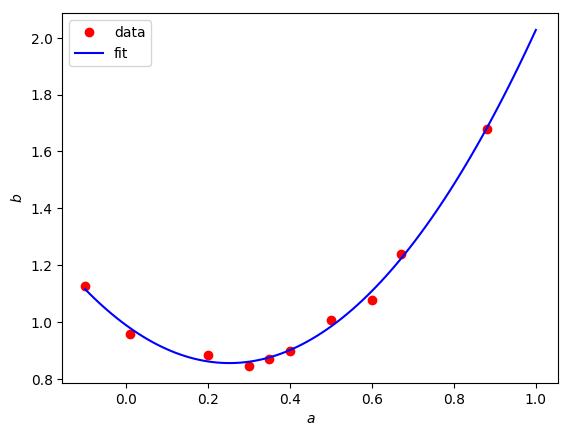

PyObject <matplotlib.legend.Legend object at 0x7fa6800aadd0>

In [8]:
using PyPlot
plot(a, b, "ro")
â = linspace(-0.1, 1, 100)
plot(â, x̂[1] .+ x̂[2] .* â .+ x̂[3] .* â.^2 +  x̂[4] .* (â .- 1).^2, "b-")
xlabel(L"a")
ylabel(L"b")
legend(["data", "fit"])

**(d)** If the least-square solution is not unique, Julia's `x̂ = A \ b` finds the `x̂` with **minimum length**, i.e. it minimizes $\Vert \hat{x} \Vert$ over all possible solutions to $A^T A \hat{x} = A^T b$.  In this problem, that means that Julia's `x̂` must be **orthogonal to what vector(s)**?  (Hint: see problem 3.) Check that this is true of the result that Julia gives you below.

In [14]:
[-1. 2. -1. 1. ]*x̂

1-element Array{Float64,1}:
 6.661338147750939e-16

## Problem 5 (10 points)

(From Strang 4.2, problem 10.)

Project $a_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ onto the line spanned by $a_2 = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$.  Then project the result back onto the line spanned by $a_1$.  Multiply these projection matrices $P_1 P_2$: is this a projection?

## Problem 6 (10 points)

(From Strang 4.2 problem 19.)

To find the projection matrix onto the plane $x-y-2z=0$, choose two vectors in that plane (the null space of what matrix?) and make them columns of $A$ so that the plane is $C(A)$.  Then compute (by hand) the projection of the point $\begin{pmatrix} 0 \\ 6 \\ 12 \end{pmatrix}$ onto this plane, and check your result in Julia.

In [72]:
A = [ 3  1 
      1  1 
      1  0 ];
b = [  0
       6 
      12 ];

x = A \ b;
p = A * x

3-element Array{Float64,1}:
 4.999999999999999 
 1.0000000000000009
 1.9999999999999991

## Problem 7 (10 points)

(From Strang, section 4.2, problem 30.)

**(a)** Find the projection matrix $P_C$ onto the column space $C(A)$ (after looking closely at the matrix!) for $A = \begin{pmatrix} 3 & 6 & 6 \\ 4 & 8 & 8 \end{pmatrix}$.

**(b)** Find the 3 by 3 projection matrix $P_R$ onto the row space of $A$.  (You can google the formula for the inverse of a 2 by 2 matrix to try to shorten your algebra… though the fact that A is rank-deficient may give you some trouble… but there is an even simpler way to do it if you realize that the row space is `_____`-dimensional.)  Multiply $B = P_C A P_R$.  Your answer $B$ may be a little surprising at first — can you explain it?

## Problem 8 (10 points)

Given two $m \times n$ matrices $A$ and $B$ and two right-hand sides $b, c \in \mathbb{R}^m$, suppose that we want to minimize:
$$
f(x) = \Vert b - Ax \Vert^2 + \Vert c - Bx \Vert^2
$$
over $x \in \mathbb{R}^n$.  That is, we are minimizing the *sum* of two least-square fitting problems.

**(a)** $\Vert b \Vert^2 + \Vert c\Vert^2 = \Vert w \Vert^2 $ for a vector $w \in \mathbb{R}^{2m}$.  Give such a $w$.

**(b)** Write down a matrix equation $C \hat{x} = d$ whose solution $\hat{x}$ gives the minimum of $f(x)$.  Give explicit formulas for $C$ and $d$ in terms of $A, B, b, c$.  Hint: use your answer from (a) to convert this into a "normal" least-squares problem first.